# Całkowanie Monte Carlo  - metodą chybił-trafił

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Zdefiniujmy funkcję, którą będziemy całkować

In [2]:
def f(x):
    return np.exp(x)

Losujemy punkty z kwadratu 

$$
[a,b] \times [0, max_{x \in [a,b]}\{f(x)\}]
$$

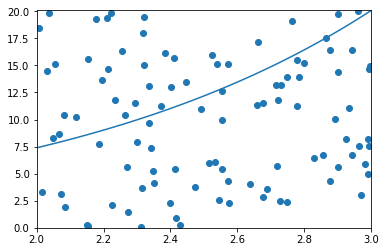

In [3]:
n=100
a=2
b=3
x = np.linspace(a, b, n)
y = f(x)
ymin=0
ymax=np.max(y)
pts = np.column_stack((stats.uniform(a,b-a).rvs(n),stats.uniform(ymin,ymax).rvs(n)))
plt.plot(x, y);
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([a,b])
plt.ylim([ymin, ymax]);
plt.show()

# Zadanie
Policz całkę z funkcji $f$ za pomocą odrzuceń na przedziale $[a,b]$ dla różnych wielkości próbek.

In [4]:
# Monte Carlo approximation
for n in 10**np.array([1,2,3,4,5,6,7]):
    pts = np.column_stack((stats.uniform(a,b-a).rvs(n),stats.uniform(ymin,ymax).rvs(n)))
    count = np.sum(pts[:, 1] < f(pts[:, 0]))
    volume = np.abs(b-a)* ymax # volume of region
    sol = (volume * count)/n
    print('%10d %.6f' % (n, sol))

        10 14.059876
       100 13.859020
      1000 12.573546
     10000 12.581580
    100000 12.706713
   1000000 12.699904
  10000000 12.697743


## Możesz sprawdzić z wynikiem całkowania numerycznego

In [6]:
from scipy import integrate
integrate.quad(f, a, b)

(12.69648082425702, 1.4095925342801928e-13)